In [9]:
import os
os.getcwd()

'c:\\Users\\Dell\\Desktop\\vehicle-volume-forecasting\\notebooks'

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("ltruck_sales.csv")

# Rename for clarity
df.columns = ["date", "sales"]

# Convert date
df["date"] = pd.to_datetime(df["date"])

# Set index
df.set_index("date", inplace=True)

# Basic check
print(df.head())
print(df.tail())
print(df.info())


            sales
date             
1976-01-01  193.6
1976-02-01  225.6
1976-03-01  281.0
1976-04-01  260.5
1976-05-01  266.1
               sales
date                
2025-07-01  1168.343
2025-08-01  1226.532
2025-09-01  1036.878
2025-10-01  1062.067
2025-11-01  1071.264
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 599 entries, 1976-01-01 to 2025-11-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   599 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB
None


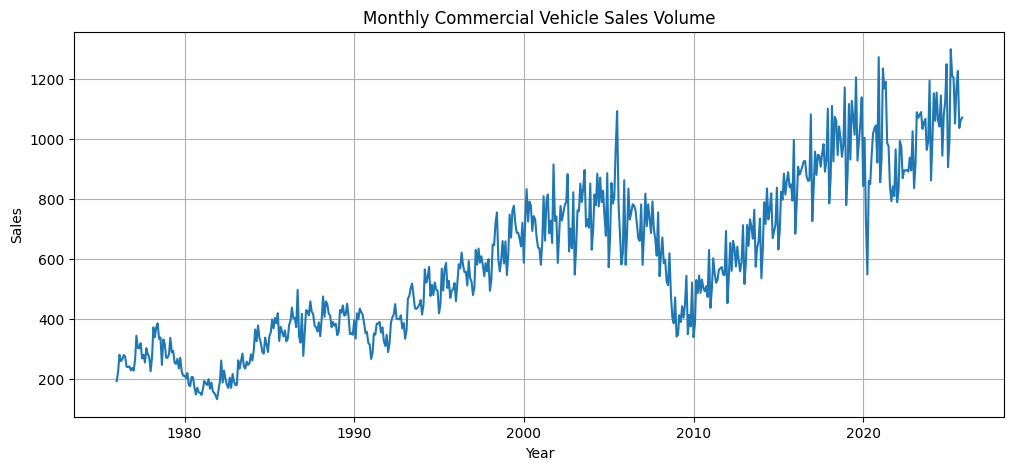

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["sales"])
plt.title("Monthly Commercial Vehicle Sales Volume")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid()
plt.show()


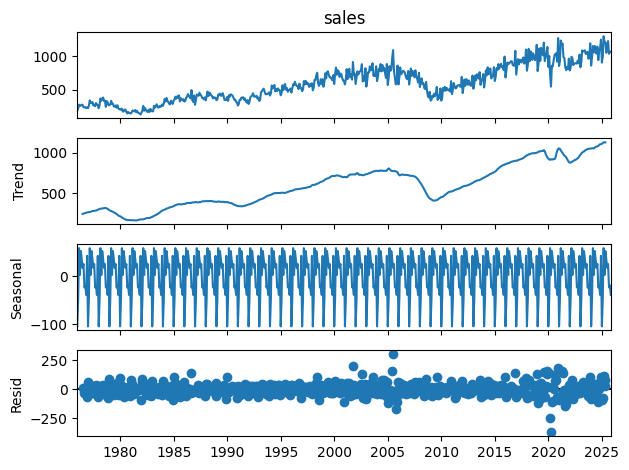

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["sales"], model="additive", period=12)
decomposition.plot()
plt.show()


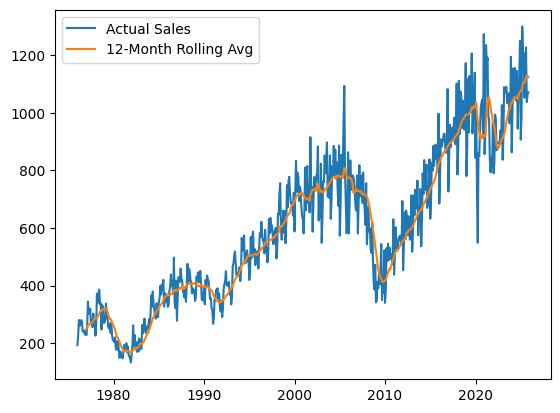

In [16]:
# Create 12-month rolling average
df["rolling_12"] = df["sales"].rolling(window=12).mean()
plt.figure()
plt.plot(df.index, df["sales"], label="Actual Sales")
plt.plot(df.index, df["rolling_12"], label="12-Month Rolling Avg")
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["sales"])

print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -0.2648582025346474
p-value: 0.9303361030033774


In [ ]:
df["sales_diff"] = df["sales"] - df["sales"].shift(1)
df.dropna(inplace=True)


In [ ]:
result_diff = adfuller(df["sales_diff"])

print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])

ADF Statistic: -9.181429847361882
p-value: 2.246434811174284e-15


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df["sales"], order=(1, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

c:\Users\Dell\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3410.171
Date:                Fri, 16 Jan 2026   AIC                           6826.343
Time:                        21:27:10   BIC                           6839.468
Sample:                    12-01-1976   HQIC                          6831.457
                         - 11-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0666      0.047      1.417      0.156      -0.025       0.159
ma.L1         -0.7608      0.035    -21.881      0.000      -0.829      -0.693
sigma2      6501.4585    276.713     23.495      0.0

In [ ]:
forecast = model_fit.forecast(steps=12)


In [ ]:
future_dates = pd.date_range(
    start=df.index[-1],
    periods=13,
    freq="MS"
)[1:]

forecast_series = pd.Series(forecast, index=future_dates)


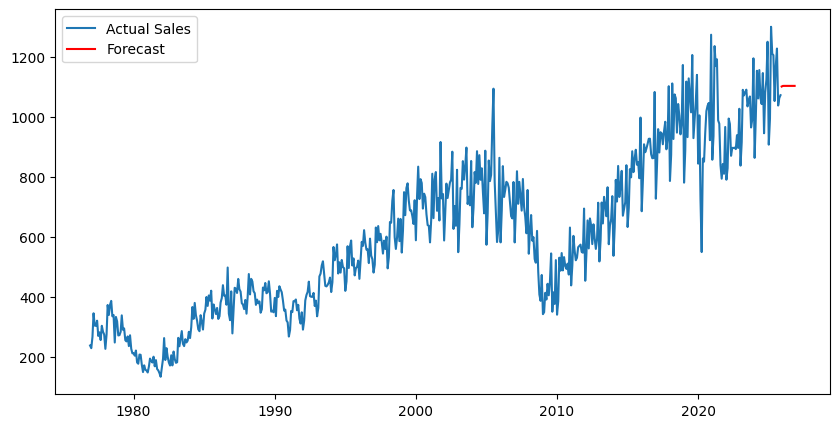

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df["sales"], label="Actual Sales")
plt.plot(forecast_series.index, forecast_series, label="Forecast", color="red")
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    df["sales"],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

sarima_fit = sarima_model.fit()
print(sarima_fit.summary())



c:\Users\Dell\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                  588
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3149.925
Date:                            Fri, 16 Jan 2026   AIC                           6309.850
Time:                                    21:29:47   BIC                           6331.622
Sample:                                12-01-1976   HQIC                          6318.341
                                     - 11-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2502      0.043      5.864      0.000       0.167       0.334
ma.L1         -0.7302      0.038   

In [ ]:
forecast = sarima_fit.forecast(steps=12)

future_dates = pd.date_range(
    start=df.index[-1],
    periods=13,
    freq="MS"
)[1:]

forecast_series = pd.Series(forecast, index=future_dates)


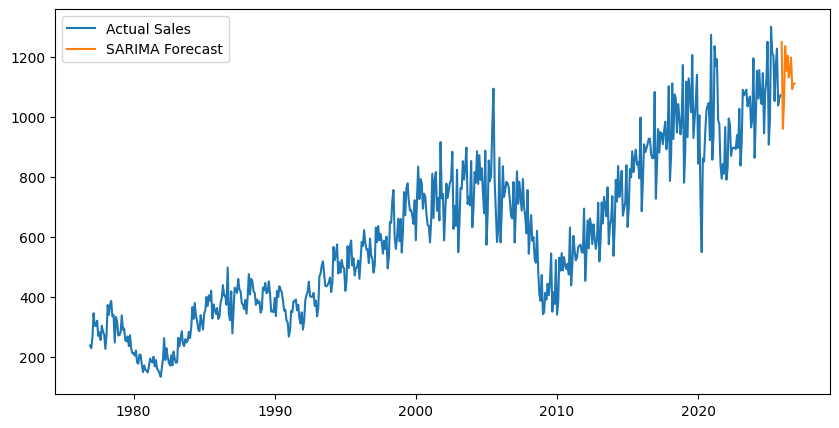

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df["sales"], label="Actual Sales")
plt.plot(forecast_series.index, forecast_series, label="SARIMA Forecast")
plt.legend()
plt.show()


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(
    df["sales"],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

sarima_fit = sarima_model.fit()


c:\Users\Dell\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
import os, joblib

os.makedirs("model", exist_ok=True)
joblib.dump(sarima_fit, "model/sarima_model.pkl")


['model/sarima_model.pkl']

In [21]:
import joblib
joblib.dump(sarima_fit, "model/sarima_model.pkl")

['model/sarima_model.pkl']